In [283]:
from math import inf
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import pytesseract

image = cv2.imread('media/captchas/369a.png', cv2.CV_8UC1)
denoised = cv2.fastNlMeansDenoising(image, None, 85, 5, 21)
threshed = cv2.threshold(denoised, 128, 255, cv2.THRESH_BINARY_INV)[1]
denoised_2 = cv2.fastNlMeansDenoising(threshed, None, 85, 5, 21)
denoised_3 = cv2.fastNlMeansDenoising(denoised_2, None, 85, 5, 21)
threshed_2 = cv2.threshold(denoised_3, 33, 255, cv2.THRESH_BINARY_INV)[1]
dilated_1 = cv2.dilate(threshed, None)
#delined = threshed.copy()
# lines = cv2.HoughLinesP(dilated_1, 1, np.pi / 180, 50, minLineLength=50, maxLineGap=2)
# if lines is not None and len(lines) > 0:
#     for line in lines:
#         x1, y1, x2, y2 = line[0]
#         cv2.line(delined, (x1, y1), (x2, y2), 0, 3)
fat_fucking_blob = cv2.dilate(threshed_2, None, iterations=4)
#grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# plt.imshow(grayscale_image)

# pil_image = Image.open('media/captchas/2a48.png')
# text = pytesseract.image_to_string(pil_image)

#image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)[1]

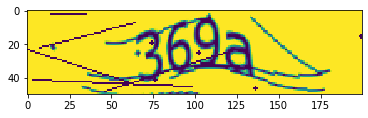

In [258]:
plt.imshow(image)

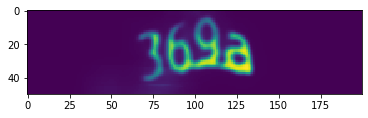

In [279]:
plt.imshow(denoised_3)

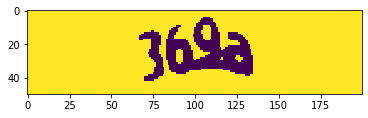

In [285]:
plt.imshow(threshed_2)

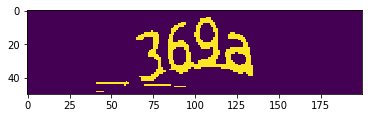

In [260]:
plt.imshow(threshed)

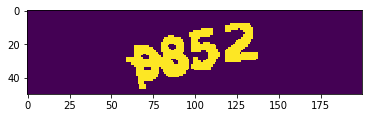

In [235]:
plt.imshow(dilated_1)

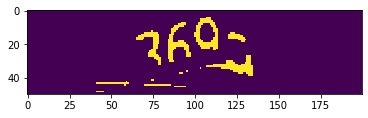

In [261]:
plt.imshow(delined)

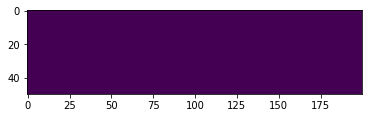

In [286]:
plt.imshow(fat_fucking_blob)

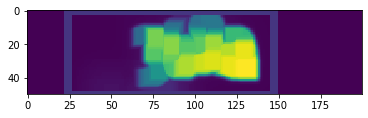

In [281]:
contours, hierarchy = cv2.findContours(fat_fucking_blob,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
image_copy = fat_fucking_blob.copy()
# hull = []
# max_x = 0
# max_y = 0
# min_x = inf
# min_y = inf
# for contour in contours:
#     for point in contour:
#         if point[0][0] > max_x:
#             max_x = point[0][0]
#         if point[0][1] > max_y:
#             max_y = point[0][1]
#         if point[0][0] < min_x:
#             min_x = point[0][0]
#         if point[0][1] < min_y:
#             min_y = point[0][1]
# hull.append(cv2.convexHull())
# #for i in range(len(contours1)):
#     # creating convex hull object for each contour
#     #hull.append(cv2.convexHull(contours1[i], False))
# # create an empty black image
# drawing = np.zeros((image_copy.shape[0], image_copy.shape[1], 3), np.uint8)
 
# draw contours and hull points
# for i in range(len(contours1)):
#     color_contours = (0, 255, 0) # green - color for contours
#     color = (255, 0, 0) # red - color for convex hull
#     # draw ith contour
#     cv2.drawContours(drawing, contours1, i, color_contours, 1, 8, hierarchy)
#     # draw ith convex hull object
#     cv2.drawContours(drawing, hull, i, color, 1, 8)
#cv2.drawContours(image_copy, contours1, -1, (0, 255, 0), 3) 
for c in contours:
    area = cv2.contourArea(c)
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image_copy, (x, y), (x + w, y + h), (36,255,12), 3)

plt.imshow(image_copy)

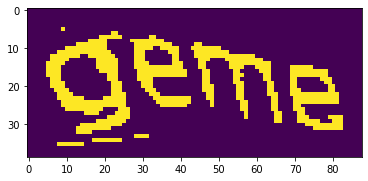

In [256]:
cropped = delined.copy()
cropped = cropped[y:y+h, x:x+w]
#denoised_2 = cv2.fastNlMeansDenoising(cropped, None, 85, 5, 21)
#denoised_3 = cv2.fastNlMeansDenoising(denoised_2, None, 85, 5, 21)
#threshed_2 = cv2.threshold(denoised_3, 128, 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(cropped)

# contours1, _ = cv2.findContours(image,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
# contours2, _ = cv2.findContours(image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# 
# contours1 = contours1[0].reshape(-1,2)
# contours2 = contours2[0].reshape(-1,2)
# 
# img1 = image.copy()
# img2 = image.copy()
# 
# for (x, y) in contours1:
#     cv2.circle(img1, (x, y), 1, (255, 0, 0), 3)
# 
# for (x, y) in contours2:
#     cv2.circle(img2, (x, y), 1, (255, 0, 0), 3)
#     
# out = np.hstack([img1, img2])
# plt.imshow(out)

# contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# plt.imshow(contours)
# lines = cv2.HoughLinesP(grayscale_image, 1, np.pi / 180, 50, minLineLength=50, maxLineGap=5)
# for line in lines:
#     x1, y1, x2, y2 = line[0]
#     cv2.line(grayscale_image, (x1, y1), (x2, y2), (0, 255, 0), 1)
# plt.imshow(grayscale_image)

pil_image = Image.fromarray(cropped)
text = pytesseract.image_to_string(pil_image)